# The era of BLS planet searches is over!

The "box function" does not have analytical maximim likelihood estimators for all its parameters, requiring the use of a grid search to sample $t_0$ and $w$. Let's see if a sum of two logistic functions offers better properties.

Define a simplified version of the [generalised logistic function](https://en.wikipedia.org/wiki/Generalised_logistic_function) as:

$$GL(t, a, k, t_0) = a + \frac{k-a}{1 + e^{-b(t-t_0)}}$$

where $t$ is time, $a$ is the lower asymptote, and $k$ is the upper asymptote. The growth rate $b$ can be assumed constant, we'll use $b=5$.

We can then define a box-like function as:

$$box(t) = GL(t, h/2, h/2+d, t_0+w) + GL(t, h/2, h/2-d, t_0)$$

where $h$ is the lightcurve baseline height, $d$ is the transit depth, $w$ is the transit width, and $t_0$ is the transit start. The maths work out as:

$$box(t) = h + \frac{d}{1 + e^{-b(t-t_0-w)}} - \frac{d}{1 + e^{-b(t-t_0)}}$$

Assuming a lightcurve $Y_i$ is subject to uncorreclted Gaussian noise:

$$Y_i \sim \mathcal{N}(box(t), \sigma^2)$$,

the joint probability density function of $\boldsymbol{Y}$ can be written as:
$$
\begin{align} p(\boldsymbol{y}) = \prod_{i=1}^{n} p(y_i) = TBD
\end{align}
$$

This function may or may not have an analytical maximum likelihood solution. This is where we need Ze's help.

## Example

In [2]:
from numpy import e
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

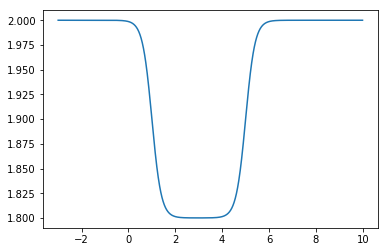

In [3]:
def geerts_logistic(t, a, k, t0, b=5.):
    return a + (k - a) / (1 + e**(-(b*(t-t0))))

def transit_model(t0=1, width=4, baseline=2., depth=0.2):
    t = np.arange(-3, 10, 0.01)
    x = geerts_logistic(t, a=baseline/2, k=baseline/2+depth, t0=t0+width)
    x += geerts_logistic(t, a=baseline/2, k=baseline/2-depth, t0=t0)
    return t, x

t, x = transit_model()
pl.plot(t, x)